# Titanic Survival Analysis: Feature Selection Insights from Visualizations

## Introduction
This report analyzes the Titanic dataset (train.csv + test.csv) using exploratory visualizations to inform **feature selection** for a predictive model. Feature selection identifies high-impact variables (e.g., those with clear survival correlations) while flagging low-value ones (e.g., minimal variance or noise).

We load the data, generate countplots/histograms for key features, and explain each visual's implications.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load data (adjust if CSVs are elsewhere)
BASE_DIR = Path('.').resolve()  # Points to FED root; change to Path(__file__).parent if in figures/
train_df = pd.read_csv('figures/train.csv')  # Or direct path if moved
print(f"Train shape: {train_df.shape}")
train_df.head()

Train shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Sex vs. Survival (Countplot)

### Visualization Description
A countplot showing passenger counts by Sex, colored by Survived status.

### Feature Selection Insights
There is a clear gender bias: a lot more females survived than males. This implies "sex" is a top predictor. This high disparity highlights demographic imbalance and ignoring it would miss key bias.

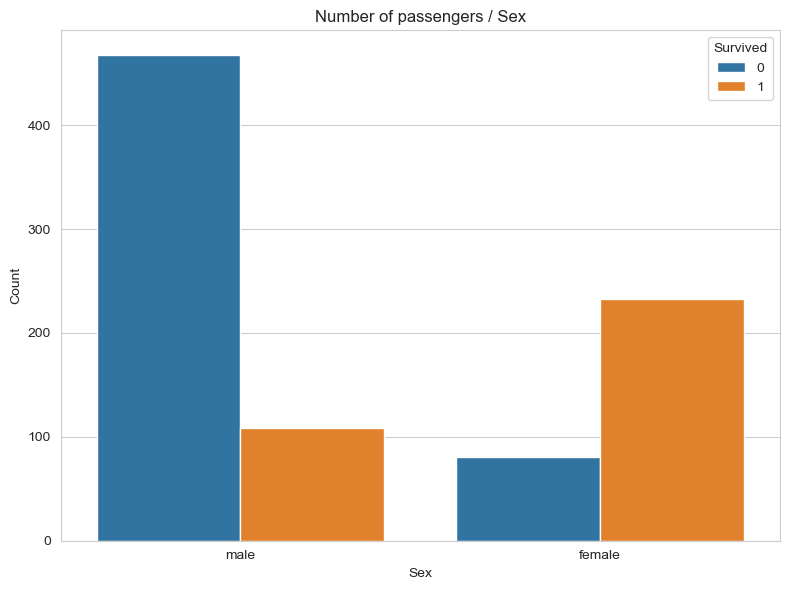

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x="Sex", hue="Survived")
plt.title("Number of passengers / Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.tight_layout()
plt.show()  

## 2. Parch vs. Survival (Countplot)

### Visualization Description
Counts by number of parents/children aboard, colored by Survived.

### Feature Selection Insights
Death count dramatically lowers with 1-2 dependents. For 3+, lilkely noise from rarity. This reveals family context matters, but most common case is "0", i.e., no parents or children with the passenger. 

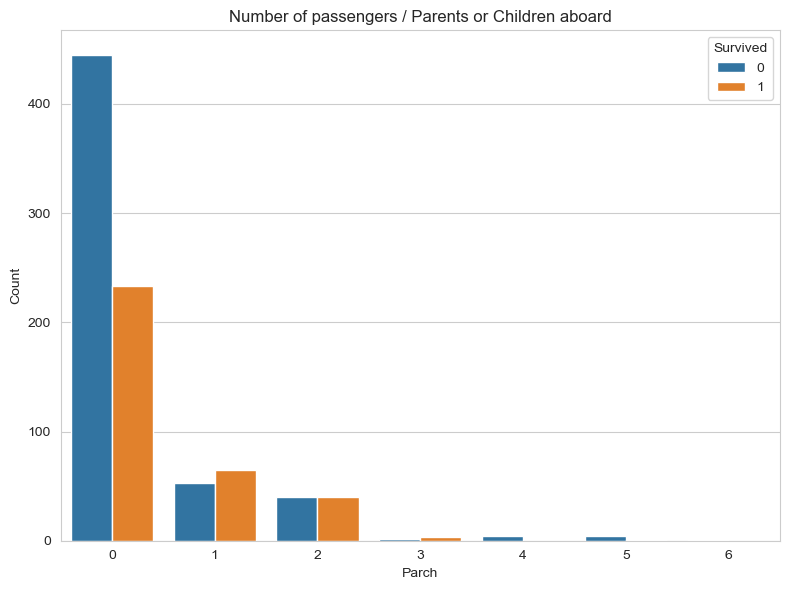

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x="Parch", hue="Survived")
plt.title("Number of passengers / Parents or Children aboard")
plt.xlabel("Parch")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.tight_layout()
plt.savefig(BASE_DIR / "parch_survived.png", dpi=300, bbox_inches="tight")
plt.show() 

## 3. Pclass vs. Survival (Countplot)

### Visualization Description
Counts by class (1=upper, 3=lower), colored by Survived.

### Feature Selection Insights
Survival is highest in 1st/highest class and death count highest in 3rd/lowest class. This is important because this visual captures wealth/fare gradients and shows the outcome interacts well with 'Fare'.

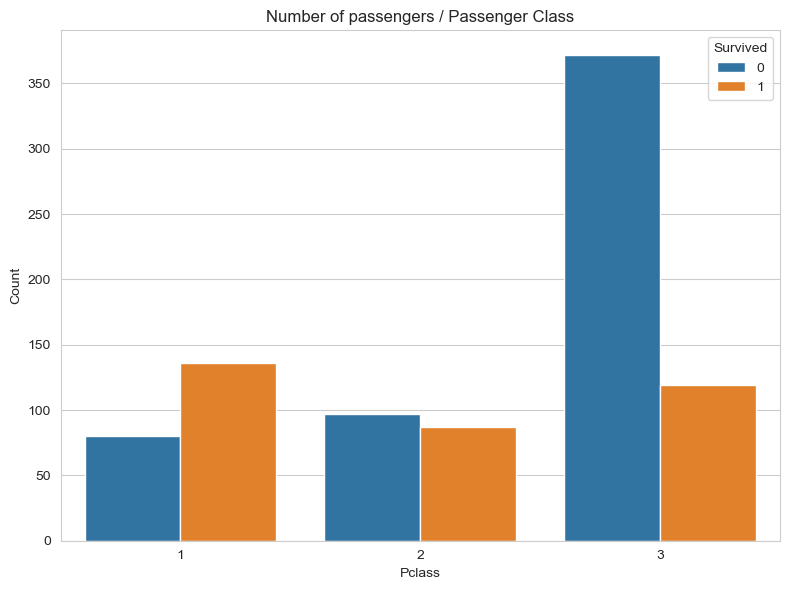

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x="Pclass", hue="Survived")
plt.title("Number of passengers / Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.tight_layout()
plt.savefig(BASE_DIR / "pclass_survived.png", dpi=300, bbox_inches="tight")
plt.show()


## 4. Age Distribution by Survival (Histogram)

### Visualization Description
Binned age histogram, overlaid for Survived groups.

### Feature Selection Insights
Bimodal—children (<10: higher survival) and elderly (>60: lower) stand out while adults are more uniform. This shows the rescue efforts could have prioritized children and the elderly. This could have something to do with the fact that, on average, elderly people on the Titanic tend to be wealthier and from the 1st class. 

/var/folders/17/2snqhb6j7xg9_tstbg_26d8m0000gn/T/ipykernel_68814/352069380.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Survived")


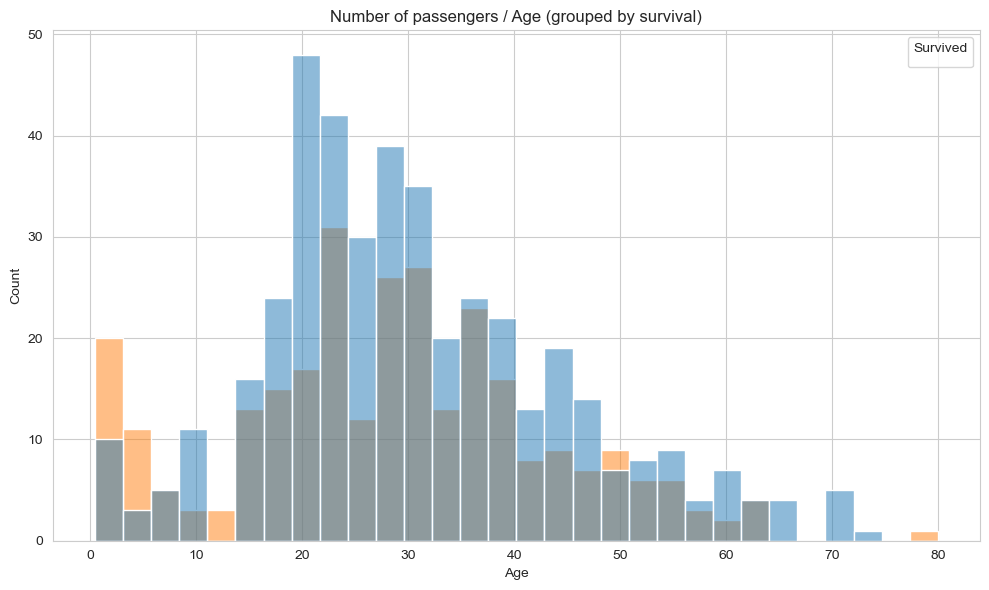

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x="Age", hue="Survived", bins=30, kde=False)
plt.title("Number of passengers / Age (grouped by survival)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived")
plt.tight_layout()
plt.savefig(BASE_DIR / "age_survived.png", dpi=300, bbox_inches="tight")
plt.show()